In [1]:
# default_exp sine_model

In [2]:
#hide 
%load_ext autoreload
%autoreload 2

In [3]:
#export
from rtma.imports import *
from rtma.core import *
from rtma.signal import *
from rtma.fft import *
from rtma.stft import *

# Sine Model

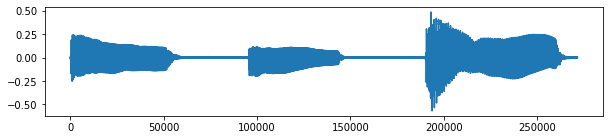

In [4]:
fn = "data/E_octaves_both.wav"
x, sr = load_audio(fn)
plot(x)

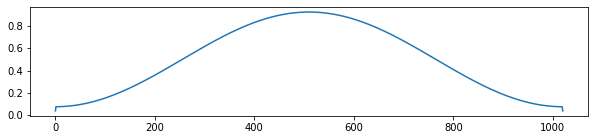

In [5]:
n_fft = 1024
h = 510
m = h*2 + 1
w = get_cola_window('hamming', m, h)
plot(w)

In [6]:
spectrum = list(stft(x, n_fft, h, w))

In [7]:
mx, px = (np.stack(s) for s in zip(*spectrum))

In [8]:
mx.shape

(534, 513)

In [9]:
mx = 20*np.log10(mx)

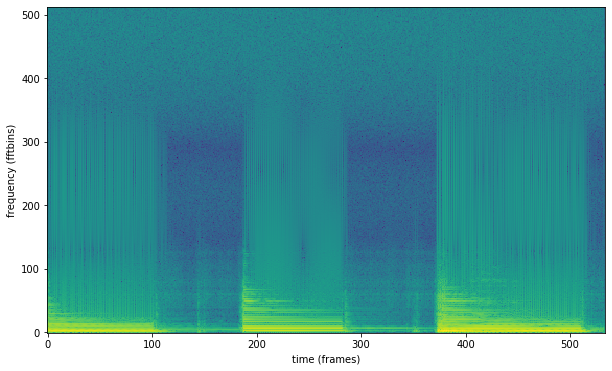

In [10]:
plot_mags(mx)

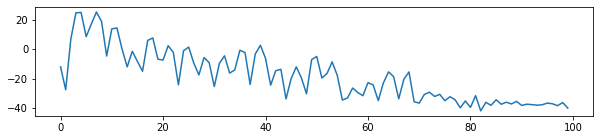

In [11]:
plot(mx[200, :100])

## Peak Detection

In [12]:
#export
def detect_peaks(x, thresh):
    # first and last cannot be peaks
    above_thresh = np.greater(x[1:-1], thresh)
    gt_before = np.greater(x[1:-1], x[:-2])
    gt_after =  np.greater(x[1:-1], x[2:])
    is_peak = above_thresh & gt_before & gt_after
    peaks_i = is_peak.nonzero()[0] + 1
    return peaks_i 

In [13]:
arr = np.array([2, 10, 3, 8, 2, 3, 1, 9, 0, 2, 1])
assert np.array_equal(detect_peaks(arr, 1), [1,3,5,7,9])
assert np.array_equal(detect_peaks(arr, 2), [1,3,5,7])
assert np.array_equal(detect_peaks(arr, 3), [1,3,7])

In [14]:
#export
def plot_peaks(x, peak_i, t=None):
    plt.figure(figsize=(10, 6))
    plt.plot(x)
    plt.plot(peak_i, x[peak_i], marker='x', color='r', linestyle='', markeredgewidth=1.5)
    if t is not None:
        plt.axhline(t, c='g')

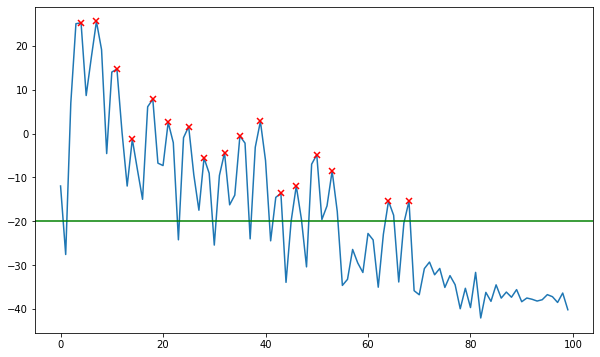

In [15]:
x = mx[200,:100]
t = -20
peak_i = detect_peaks(x, t)
plot_peaks(x, peak_i, t)

## Peak Interpolation

In [16]:
#export
def interpolate_peaks(x, peak_i):
    a, b, c = x[peak_i-1], x[peak_i], x[peak_i+1]
    ipeak_i = peak_i + 0.5 * (a - c) / (a - 2*b + c)
    ipeak_v = b - 0.25 * (a - c) * (ipeak_i - peak_i)
    return ipeak_i, ipeak_v

In [17]:
x = mx[200,:30]
t = -25
peak_i = detect_peaks(x, t)
ipeak_i, ipeak_v = interpolate_peaks(x, peak_i)
peak_i, ipeak_i, ipeak_v

(array([ 4,  7, 11, 14, 18, 21, 25, 28]),
 array([ 3.51175719,  7.061721  , 10.54417648, 14.10603846, 17.60596861,
        21.18053712, 24.68730608, 28.27470026]),
 array([27.25809334, 25.59565951, 16.26360341, -1.2149441 ,  9.09982353,
         2.77221543,  2.24417737, -5.01670619]))

In [18]:
#export
def plot_ipeaks(x, ipeak_i, ipeak_v, peak_i=None, t=None):
    plt.figure(figsize=(10, 6))
    plt.plot(x)
    plt.plot(ipeak_i, ipeak_v, marker='x', color='g', linestyle='', markeredgewidth=1.5)
    if peak_i is not None:
        plt.plot(peak_i, x[peak_i], marker='x', color='r', linestyle='', markeredgewidth=1.5)
    if t is not None:
        plt.axhline(t, c='g')

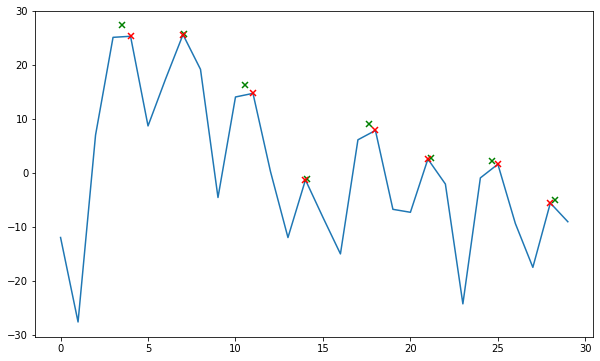

In [19]:
plot_ipeaks(x, ipeak_i, ipeak_v, peak_i=peak_i)